In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive



In [ ]:
# Function to load datasets from Google Drive
def load_datasets(yellow_path, no_yellow_path):
    yellow_df = pd.read_csv(yellow_path)
    no_yellow_df = pd.read_csv(no_yellow_path)
    return yellow_df, no_yellow_df

# File paths (replace with the correct paths in your Google Drive)
yellow_light_path = '/content/drive/MyDrive/sumo_simulation_data/yellow_ND_data.csv'
no_yellow_light_path = '/content/drive/MyDrive/sumo_simulation_data/no_yellow_ND_data.csv'

# Load datasets
yellow_df, no_yellow_df = load_datasets(yellow_light_path, no_yellow_light_path)

# Check the first few rows of each dataset
print("Yellow Light Dataset:")
print(yellow_df.head())

print("\nNo Yellow Light Dataset:")
print(no_yellow_df.head())


Yellow Light Dataset:
        id  depart departLane  departPos  departSpeed  departDelay  arrival  \
0  flow1.0     0.0     4to1_0        5.1          0.0          0.0     27.0   
1  flow2.0     0.0     5to1_0        5.1          0.0          0.0     28.0   
2  flow4.0     6.0     4to1_0        5.1          0.0          6.0     35.0   
3  flow5.0     5.0     5to1_0        5.1          0.0          5.0     35.0   
4  flow2.1    11.0     5to1_0        5.1          0.0          3.8     38.0   

  arrivalLane  arrivalPos  arrivalSpeed  ...  vType  speedFactor  vaporized  \
0      1to5_0        89.6         14.68  ...    car         1.06        NaN   
1      1to4_0        89.6         12.62  ...    car         0.94        NaN   
2      1to3_0        89.6         11.87  ...    car         1.08        NaN   
3      1to2_0        89.6         11.67  ...    car         1.03        NaN   
4      1to4_0        89.6         13.74  ...    car         1.05        NaN   

        CO_abs       CO2_abs

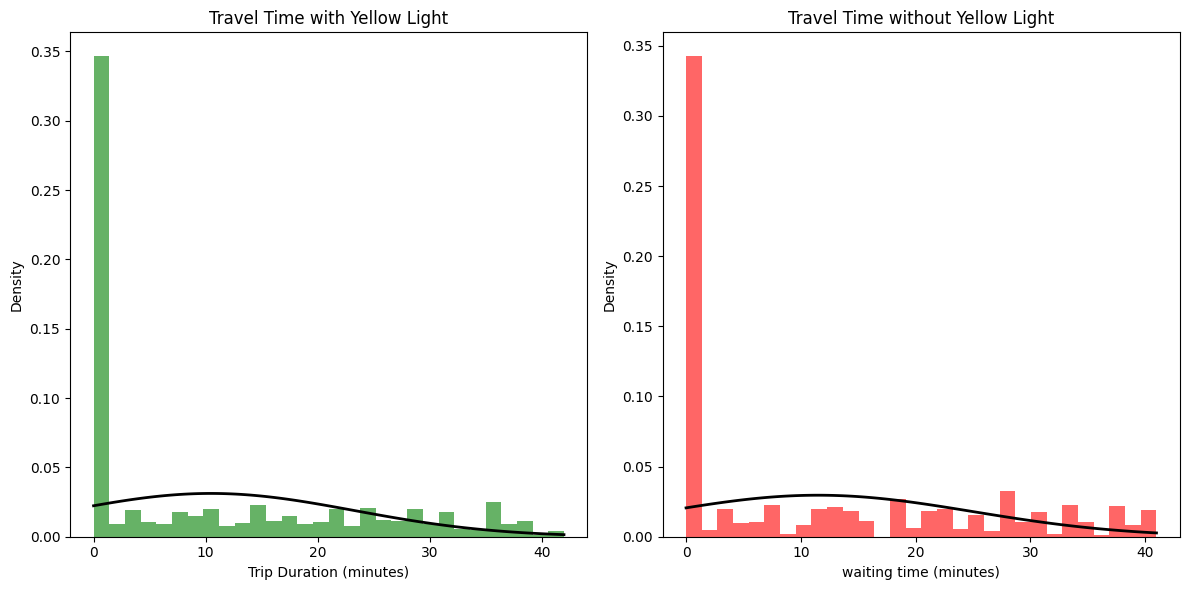

In [ ]:
# Function to plot histograms and fit normal distributions
def plot_histograms(yellow_wait, no_yellow_wait):
    plt.figure(figsize=(12, 6))

    # Yellow light
    plt.subplot(1, 2, 1)
    plt.hist(yellow_wait, bins=30, density=True, alpha=0.6, color='g')
    mean_yellow, std_yellow = np.mean(yellow_wait), np.std(yellow_wait)
    x = np.linspace(min(yellow_wait), max(yellow_wait), 100)
    p = stats.norm.pdf(x, mean_yellow, std_yellow)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Travel Time with Yellow Light')
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Density')

    # No yellow light
    plt.subplot(1, 2, 2)
    plt.hist(no_yellow_wait, bins=30, density=True, alpha=0.6, color='r')
    mean_no_yellow, std_no_yellow = np.mean(no_yellow_wait), np.std(no_yellow_wait)
    x = np.linspace(min(no_yellow_wait), max(no_yellow_wait), 100)
    p = stats.norm.pdf(x, mean_no_yellow, std_no_yellow)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Travel Time without Yellow Light')
    plt.xlabel('waiting time (minutes)')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Extract 'duration' column for both datasets
yellow_wait = yellow_df['waitingTime']
no_yellow_wait = no_yellow_df['waitingTime']

# Plot histograms
plot_histograms(yellow_wait, no_yellow_wait)


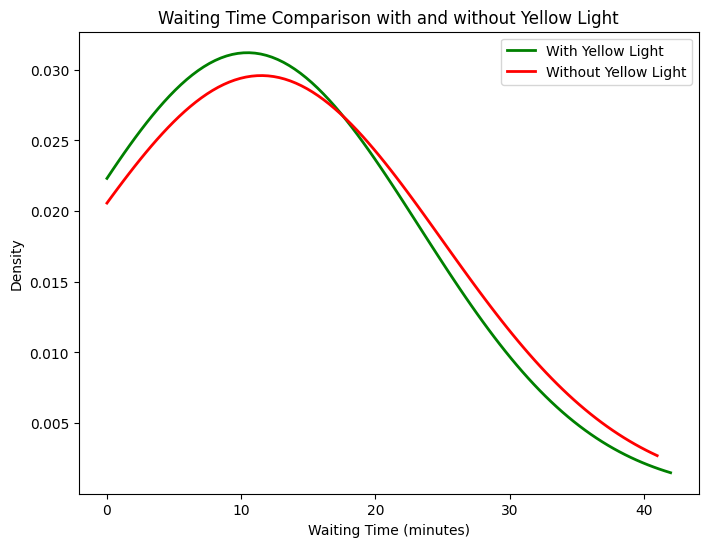

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to plot normal distribution curves for two datasets on the same graph
def plot_two_normal_distribution_curves(data1, data2, label1, label2):
    plt.figure(figsize=(8, 6))

    # Calculate the mean and standard deviation for both datasets
    mean1, std1 = np.mean(data1), np.std(data1)
    mean2, std2 = np.mean(data2), np.std(data2)

    # Generate x values (range) for plotting the normal distribution curve
    x1 = np.linspace(min(data1), max(data1), 100)
    x2 = np.linspace(min(data2), max(data2), 100)

    # Generate y values using the normal distribution's PDF
    y1 = stats.norm.pdf(x1, mean1, std1)
    y2 = stats.norm.pdf(x2, mean2, std2)

    # Plot both normal distribution curves
    plt.plot(x1, y1, color='g', linewidth=2, label=label1)
    plt.plot(x2, y2, color='r', linewidth=2, label=label2)

    # Customize the plot
    plt.title('Waiting Time Comparison with and without Yellow Light')
    plt.xlabel('Waiting Time (minutes)')
    plt.ylabel('Density')

    # Add a legend to distinguish between the curves
    plt.legend()

    # Show the plot
    plt.show()

# Example usage for Yellow Light and No Yellow Light data
yellow_waiting_times = yellow_df['waitingTime']  # Assuming 'waitingTime' column is in the dataframe
no_yellow_waiting_times = no_yellow_df['waitingTime']  # Assuming 'waitingTime' column is in the dataframe

# Plot both curves on the same graph
plot_two_normal_distribution_curves(yellow_waiting_times, no_yellow_waiting_times,
                                    'With Yellow Light', 'Without Yellow Light')


In [ ]:
# Function to calculate mean and standard deviation for waiting time
def calculate_stats(yellow_waiting_times, no_yellow_waiting_times):
    mean_yellow = np.mean(yellow_waiting_times)
    std_yellow = np.std(yellow_waiting_times)

    mean_no_yellow = np.mean(no_yellow_waiting_times)
    std_no_yellow = np.std(no_yellow_waiting_times)

    print(f"Mean Waiting Time with Yellow Light: {mean_yellow:.2f} seconds")
    print(f"Standard Deviation with Yellow Light: {std_yellow:.2f} seconds")

    print(f"Mean Waiting Time without Yellow Light: {mean_no_yellow:.2f} seconds")
    print(f"Standard Deviation without Yellow Light: {std_no_yellow:.2f} seconds")

# Example usage: Assuming 'waitingTime' column is in the dataframe
yellow_waiting_times = yellow_df['waitingTime']
no_yellow_waiting_times = no_yellow_df['waitingTime']

# Calculate and print mean and standard deviation for waiting time
calculate_stats(yellow_waiting_times, no_yellow_waiting_times)


Mean Waiting Time with Yellow Light: 10.47 seconds
Standard Deviation with Yellow Light: 12.78 seconds
Mean Waiting Time without Yellow Light: 11.50 seconds
Standard Deviation without Yellow Light: 13.48 seconds


In [ ]:
# Function to perform hypothesis testing on waiting time
def perform_ttest(yellow_waiting_times, no_yellow_waiting_times):
    t_stat, p_value = stats.ttest_ind(yellow_waiting_times, no_yellow_waiting_times)
    print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("The difference in waiting times is statistically significant.")
    else:
        print("The difference in waiting times is not statistically significant.")

# Example usage: Assuming 'waitingTime' column is in the dataframe
yellow_waiting_times = yellow_df['waitingTime']
no_yellow_waiting_times = no_yellow_df['waitingTime']

# Perform t-test to compare waiting times
perform_ttest(yellow_waiting_times, no_yellow_waiting_times)


T-statistic: -1.8567, p-value: 0.0635
The difference in waiting times is not statistically significant.


In [ ]:
import numpy as np
import scipy.stats as stats

# Function to calculate confidence interval
def calculate_confidence_interval(data, confidence=0.95):
    # Calculate the sample mean
    mean = np.mean(data)

    # Calculate the standard error (std dev / sqrt(n))
    std_dev = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
    n = len(data)
    std_error = std_dev / np.sqrt(n)

    # Get the Z-score for the given confidence level
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)

    # Calculate the margin of error
    margin_of_error = z_score * std_error

    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return mean, lower_bound, upper_bound

# Example usage for Yellow Light data
yellow_waiting_times = yellow_df['waitingTime']  # Assuming 'waitingTime' column is in the dataframe
mean_yellow, lower_yellow, upper_yellow = calculate_confidence_interval(yellow_waiting_times)

print(f"Yellow Light Data: Mean = {mean_yellow:.2f}, 95% Confidence Interval = [{lower_yellow:.2f}, {upper_yellow:.2f}]")

# Example usage for No Yellow Light data
no_yellow_waiting_times = no_yellow_df['waitingTime']  # Assuming 'waitingTime' column is in the dataframe
mean_no_yellow, lower_no_yellow, upper_no_yellow = calculate_confidence_interval(no_yellow_waiting_times)

print(f"No Yellow Light Data: Mean = {mean_no_yellow:.2f}, 95% Confidence Interval = [{lower_no_yellow:.2f}, {upper_no_yellow:.2f}]")


Yellow Light Data: Mean = 10.47, 95% Confidence Interval = [9.72, 11.22]
No Yellow Light Data: Mean = 11.50, 95% Confidence Interval = [10.71, 12.28]
